In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from markov_device import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

ACT-R connection has been started.


In [12]:
m1 = MarkovACTR(setup=False) 
m1.setup(model="markov-model1", verbose=False, 
        task_params={'REWARD_PROBABILITY':.9, 'REWARD':{'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}},
        actr_params={'ans':.5, 'mas':.5, 'egs':.5})
print(m1)
m1.run_experiment(500)

m2 = MarkovACTR(setup=False) 
m2.setup(model="markov-model2", verbose=False, 
        task_params={'REWARD_PROBABILITY':.9, 'REWARD':{'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}},
        actr_params={'ans':.5, 'mas':.5, 'egs':.5})
print(m2)
m2.run_experiment(500)

######### SETUP MODEL markov-model1 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.9, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}} <<
 	>> ACT-R PARAMETERS: {'v': None, 'seed': [100, 0], 'ans': 0.5, 'le': 1.0, 'mas': 0.5, 'egs': 0.5, 'alpha': 0.2, 'imaginal-activation': 1.0} <<

######### SETUP MODEL markov-model2 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.9, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}} <<
 	>> ACT-R PARAMETERS: {'v': None, 'seed': [100, 0], 'ans': 0.5, 'le': 1.0, 'mas': 0.5, 'egs': 0.5, 'alpha': 0.2, 'imaginal-activation': 1.0} <<



In [13]:
df1, df2 = m1.calculate_stay_probability(), m2.calculate_stay_probability()
df1_state1stay = df1.groupby(['received_reward', 'reward_frequency', 'state_frequency']).agg({'state1_stay': lambda x: x.mean(skipna=True)}).reset_index()
df2_state1stay = df2.groupby(['received_reward', 'reward_frequency', 'state_frequency']).agg({'state1_stay': lambda x: x.mean(skipna=True)}).reset_index()

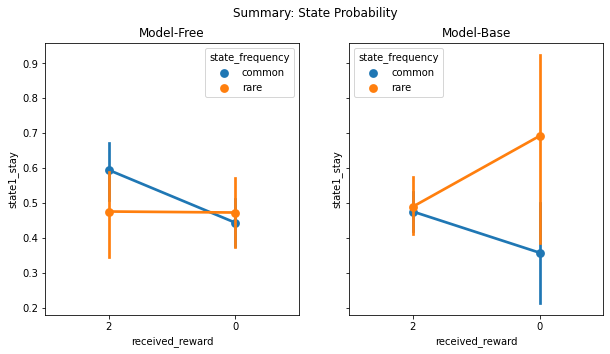

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)
fig.suptitle('Summary: State Probability')
sns.pointplot(data=df1, x='received_reward', y='state1_stay',
                   hue='state_frequency',
                   order = sorted(df1['received_reward'].unique(), reverse=True), 
                   ax=axes[0]) 
sns.pointplot(data=df2, x='received_reward', y='state1_stay',
                   hue='state_frequency',
                   order = sorted(df1['received_reward'].unique(), reverse=True), 
                   ax=axes[1]) 
axes[0].set_title('Model-Free')
axes[1].set_title('Model-Base')

plt.show()

In [15]:
df1['state1_stay_cum'] = df1[['state1_stay']].cumsum().reset_index().apply(lambda x: x['state1_stay']/(x['index']+1), axis=1)
df2['state1_stay_cum'] = df2[['state1_stay']].cumsum().reset_index().apply(lambda x: x['state1_stay']/(x['index']+1), axis=1)

In [16]:
df1['index_bin'] = pd.cut(df1.reset_index()['index'], 5, labels=False, ordered=False, right=False) 
df2['index_bin'] = pd.cut(df2.reset_index()['index'], 5, labels=False, ordered=False, right=False)

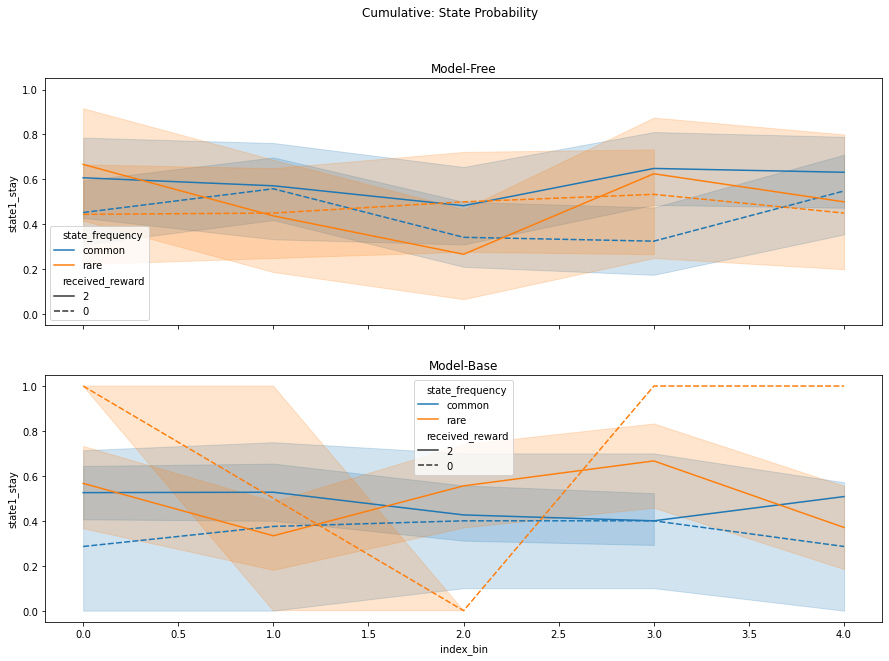

In [17]:
fig, axes = plt.subplots(2,1, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Cumulative: State Probability')
sns.lineplot(data=df1.reset_index(), x='index_bin', y='state1_stay',
                   hue='state_frequency', style='received_reward', style_order=[2,0],
                   ax=axes[0]) 
sns.lineplot(data=df2.reset_index(), x='index_bin', y='state1_stay',
                   hue='state_frequency', style='received_reward', style_order=[2,0],
                   ax=axes[1]) 
axes[0].set_title('Model-Free')
axes[1].set_title('Model-Base')
plt.show()